In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV 
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
train = pd.read_csv('./data/train_cleaned.csv')

In [3]:
train.head()

,Unnamed: 0,index,id,mssubclass,mszoning,lotfrontage,lotarea,lotshape,landcontour,lotconfig,landslope,neighborhood,condition1,bldgtype,housestyle,overallqual,overallcond,yearbuilt,roofstyle,masvnrtype,masvnrarea,exterqual,foundation,bsmtqual,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtunfsf,heatingqc,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,functional,fireplaces,fireplacequ,garagetype,garagefinish,garagearea,garagecond,wooddecksf,mosold,yrsold,saleprice,porchpres,poolpres,garagepres,fireplacepres,masvnrpres,bsmtpres,shedpres,exterior,age_sold,remodelled,2ndfloorpres,bighouse
0,0,0,109,60,RL,5.968981,21.101398,0.730463,Lvl,CulDSac,flat,Sawyer,RRAe,1Fam,2Story,6,2.602594,14.145138,Gable,BrkFace,8.938501,1.820334,CBlock,1.540963,0.730463,GLQ,10.435059,8.013884,2.055642,13.260612,0.000000,2,0.730463,1.540963,0.730463,1.820334,Typ,0.000000,0,Attchd,RFn,475.0,TA,0.00000,1.540963,2010,32.350059,1,0,1,0,1,1,0,Wood,4.697012,1.0,1,0.0
1,1,1,544,60,RL,5.093857,20.433612,0.730463,Lvl,CulDSac,flat,SawyerW,Norm,1Fam,2Story,7,2.055642,14.176584,Gable,BrkFace,7.216434,1.820334,PConc,1.820334,0.730463,GLQ,10.897674,8.831514,2.055642,14.368756,0.730463,2,0.730463,1.820334,0.730463,1.820334,Typ,0.730463,3,Attchd,RFn,559.0,TA,0.00000,1.820334,2009,35.529446,1,0,1,1,1,1,0,Vinyl,3.237728,1.0,1,0.0
2,2,2,153,20,RL,5.914940,18.962955,0.000000,Lvl,Inside,flat,NAmes,Norm,1Fam,1Story,5,2.440268,14.108639,Gable,None,0.000000,1.540963,CBlock,1.540963,0.730463,GLQ,11.263544,9.222126,1.540963,12.282128,0.730463,1,0.000000,1.540963,0.730463,1.820334,Typ,0.000000,0,Detchd,Unf,246.0,TA,0.00000,0.730463,2010,31.310566,1,0,1,0,0,1,0,Vinyl,5.591427,1.0,0,0.0
3,3,3,318,60,RL,6.047664,19.794720,0.000000,Lvl,Inside,flat,Timber,Norm,1Fam,2Story,5,2.055642,14.192207,Gable,None,0.000000,1.540963,PConc,1.820334,0.730463,Unf,0.000000,9.616087,1.820334,13.189203,0.000000,2,0.730463,1.540963,0.730463,1.540963,Typ,0.000000,0,BuiltIn,Fin,400.0,TA,6.65495,1.820334,2010,34.070564,0,0,1,0,0,1,0,Vinyl,1.820334,1.0,1,0.0
4,4,4,255,50,RL,6.268453,21.317794,0.730463,Lvl,Inside,flat,SawyerW,Norm,1Fam,1.5Fin,6,2.602594,14.023122,Gable,None,0.000000,1.540963,PConc,1.194318,0.730463,Unf,0.000000,11.054693,1.540963,13.191264,0.000000,2,0.000000,1.540963,0.730463,1.540963,Typ,0.000000,0,Detchd,Unf,484.0,TA,0.00000,1.540963,2010,32.699822,1,0,1,0,0,1,0,Wood,6.844946,1.0,1,0.0


In [4]:
# remove unnamed and index columns:
train = train.iloc[:, 2:]

In [5]:
print("Train shape: ", train.shape)

Train shape:  (2046, 57)


In [6]:
train.info()
# convert mssubclass to string again since it got converted back to int on import
train['mssubclass'] = train['mssubclass'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 57 columns):
id               2046 non-null int64
mssubclass       2046 non-null int64
mszoning         2046 non-null object
lotfrontage      2046 non-null float64
lotarea          2046 non-null float64
lotshape         2046 non-null float64
landcontour      2046 non-null object
lotconfig        2046 non-null object
landslope        2046 non-null object
neighborhood     2046 non-null object
condition1       2046 non-null object
bldgtype         2046 non-null object
housestyle       2046 non-null object
overallqual      2046 non-null int64
overallcond      2046 non-null float64
yearbuilt        2046 non-null float64
roofstyle        2046 non-null object
masvnrtype       2046 non-null object
masvnrarea       2046 non-null float64
exterqual        2046 non-null float64
foundation       2046 non-null object
bsmtqual         2046 non-null float64
bsmtexposure     2046 non-null float64
bsmtfintype1 

In [7]:
#### One-hot encoding:
train_dummies = pd.get_dummies(train, drop_first = True)
train_dummies.shape

(2046, 160)

In [8]:
x = train_dummies.loc[:, train_dummies.columns != 'saleprice']
y = train_dummies[['saleprice']]
print(x.shape)
print(y.shape)

(2046, 159)
(2046, 1)


### Train-Test split train data:

In [9]:
np.random.seed(100)
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.3, random_state = 7)
print(xtrain.shape)
print(xtest.shape)

(1432, 159)
(614, 159)


In [10]:
scaler = StandardScaler()

xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

### Hyperparameter Tuning:

#### Lasso $\alpha$:

In [11]:
l_alpha = np.arange(0.001,0.15,0.0025)

# fits multiple alphas
lassocv = LassoCV(alphas = l_alpha, cv = 5)
lassocv = lassocv.fit(xtrain_scaled, ytrain)

print('optimal lasso alpha: ', lassocv.alpha_)
print('best lasso R2: ', lassocv.score(xtrain_scaled, ytrain))

optimal lasso alpha:  0.013500000000000002
best lasso R2:  0.9384360379997755


#### Ridge $\alpha$:

In [12]:
r_alpha = np.logspace (0,5,200)

# fits multiple alphas
ridgecv = RidgeCV(alphas = r_alpha, cv = 5)
ridgecv = ridgecv.fit(xtrain_scaled, ytrain)

print('optimal ridge alpha: ', ridgecv.alpha_)
print('best ridge R2: ', ridgecv.score(xtrain_scaled, ytrain))

optimal ridge alpha:  34.09285069746813
best ridge R2:  0.9433644535219203


#### Elastic Net $\lambda$ and $\alpha$

In [13]:
enet_alpha = np.arange(0, 1, 0.005)
enet_ratio = [.01, .1, .2, .3, .5, .7, .9, .95, .99, 1]

# fits multiple alphas and rhos
enetcv = ElasticNetCV(alphas = enet_alpha, l1_ratio = enet_ratio, cv = 5)
enetcv = enetcv.fit(xtrain_scaled, ytrain)

print('optimal enet alpha: ', enetcv.alpha_)
print('optimal enet lambda: ', enetcv.l1_ratio_)
print('best elastic net R2: ', enetcv.score(xtrain_scaled, ytrain))

optimal enet alpha:  0.015
optimal enet lambda:  0.9
best elastic net R2:  0.9384213538911115


### Cross Validation:

##### instantiate models with previously selected hyperparameters

In [14]:
linmod = LinearRegression()
lasso = Lasso(alpha = lassocv.alpha_)
ridge = Ridge(alpha = ridgecv.alpha_)
enet = ElasticNet(alpha = enetcv.alpha_, l1_ratio = enetcv.l1_ratio_)

In [15]:
nfolds = 5 
np.random.seed(100)

def crossval(model, x, y):
    kf = KFold(nfolds, shuffle = True, random_state = 7)
    rmse = np.sqrt(-cross_val_score(model, x, y, cv = kf, scoring = 'neg_mean_squared_error'))
    r2 = cross_val_score(model, x, y, cv = kf)
    return 'mean CV R2:', r2.mean(), \
           'mean CV RMSE:', rmse.mean(), \
           'CV R2 variance:', r2.var(), \
           'CV RMSE variance:', rmse.var()

In [16]:
# baseline model: using dummy regressor for prediction using mean
dummy_regressor = DummyRegressor()
print('Baseline model: \n', crossval(dummy_regressor, xtrain_scaled, ytrain))

Baseline model: 
 ('mean CV R2:', -0.018430043011186115, 'mean CV RMSE:', 2.492453070618192, 'CV R2 variance:', 0.0006112643999752674, 'CV RMSE variance:', 0.003806074954455209)


In [17]:
# ordinary linear regression
print('Ordinary Linear Regression: \n', crossval(linmod, xtrain_scaled, ytrain))

Ordinary Linear Regression: 
 ('mean CV R2:', -2.848212960826582e+23, 'mean CV RMSE:', 761867803317.7507, 'CV R2 variance:', 2.950439661963025e+47, 'CV RMSE variance:', 1.2329780200286196e+24)


In [18]:
# lasso regression
print('Lasso: \n', crossval(lasso, xtrain_scaled, ytrain))

Lasso: 
 ('mean CV R2:', 0.9183259312335963, 'mean CV RMSE:', 0.6989278872004749, 'CV R2 variance:', 0.0005921673345533093, 'CV RMSE variance:', 0.009974496339304839)


In [19]:
# ridge regression
print('Ridge: \n', crossval(ridge, xtrain_scaled, ytrain))

Ridge: 
 ('mean CV R2:', 0.9170115283836591, 'mean CV RMSE:', 0.7023389996645648, 'CV R2 variance:', 0.0007877025725116325, 'CV RMSE variance:', 0.01340528227058931)


In [20]:
# elastic net regression
print('Elastic Net: \n', crossval(enet, xtrain_scaled, ytrain))

Elastic Net: 
 ('mean CV R2:', 0.9183233271468196, 'mean CV RMSE:', 0.6989408540690764, 'CV R2 variance:', 0.0005922673641543568, 'CV RMSE variance:', 0.009974550564943728)



| Model 	| mean CV R2      	| mean CV RMSE    	| var CV R2 | var CV RMSE
|-------	|---------	|---------	| ------------| -----------|
|Train - Baseline model|-0.01843| 2.49245|0.0006112|0.003806|
|Train - Ordinary Linear Regression|-2.84821e+23|761867803317|2.95043e+47|1.23297e+24|
|Train - Lasso regression|0.91832|0.69892|0.0005921|0.0099744|
|Train - Ridge regression|0.91701|0.702338|0.0007877|0.013405|
|Train - Elastic Net regression|0.91832|0.69894|0.0005922|0.009974|

The elastic net model performed the best. All regularized models (Lasso, Ridge, Elastic Net) performed better than the ordinary linear model, i.e. small RMSE and R<sup>2</sup> close to 1.

### Model Evaluation:

In [21]:
def rmse(ytest, ypred):
    return np.sqrt(mean_squared_error(ytest, ypred))

In [22]:
# use dummy regressor to predict using mean
dummy_regressor = DummyRegressor()
baseline_mod = dummy_regressor.fit(xtrain_scaled, ytrain)
baseline_pred = dummy_regressor.predict(xtest_scaled)
print(f'Baseline R2: {dummy_regressor.score(xtest_scaled, ytest)}')
print(f'Baseline RMSE: {rmse(ytest, baseline_pred)}')

Baseline R2: -0.0023493489794239597
Baseline RMSE: 2.527262018287956


In [23]:
# Ordinary linear regression
linmod = linmod.fit(xtrain_scaled, ytrain)
ypred = linmod.predict(xtest_scaled)
print('SLR test R2: ', linmod.score(xtest_scaled, ytest))
print('SLR test RMSE: ', rmse(ytest, ypred))

SLR test R2:  -6.02372431004408e+20
SLR test RMSE:  61954557255.81955


In [24]:
# Lasso
lasso_mod = lasso.fit(xtrain_scaled, ytrain)
ypred = lasso_mod.predict(xtest_scaled)
print('Lasso test R2: ', lasso_mod.score(xtest_scaled, ytest))
print('Lasso test RMSE: ', rmse(ytest, ypred))

Lasso test R2:  0.9098774016273719
Lasso test RMSE:  0.7578051745768476


In [25]:
# Ridge
ridge_mod = ridge.fit(xtrain_scaled, ytrain)
ypred = ridge_mod.predict(xtest_scaled)
print('Ridge test R2: ', ridge_mod.score(xtest_scaled, ytest))
print('Ridge test RMSE: ', rmse(ytest, ypred))

Ridge test R2:  0.9056387869741976
Ridge test RMSE:  0.7754208452539226


In [26]:
# Elastic Net
enet_mod = enet.fit(xtrain_scaled, ytrain)
ypred = enet_mod.predict(xtest_scaled)
print('Elastic Net test R2: ', enet_mod.score(xtest_scaled, ytest))
print('Elastic Net test RMSE: ', rmse(ytest, ypred))

Elastic Net test R2:  0.9099483885952923
Elastic Net test RMSE:  0.7575066651584799


| Model | Train R2  | Test R2 | Train RMSE | Test RMSE|
|-----------|---------|---------|---------|---------| 
|Baseline Model|-0.01843|-0.0023493|2.49245|2.52726| 
|Ordinary Linear Regression|-2.84821e+23|-6.0237e+20|761867803317|61954557255|
|Lasso Regression|0.918325|0.909877|0.698927|0.757805|
|Ridge Regression|0.917011|0.905638|0.702338|0.7754208|
|Elastic Net Regression|0.918323|0.909948|0.698940|0.7575066|

### Scale data
- StandardScaler xtrain and xtest
- Box-Cox transform ytrain and ytest

In [27]:
from scipy.special import boxcox1p

# scale data - standardscaler
scaler = StandardScaler()

xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# ytrain_scaled = scaler.fit_transform(ytrain)
# ytest_scaled = scaler.transform(ytest)

# transform y
ytrain['saleprice'] = boxcox1p(ytrain['saleprice'],0.15)
ytest['saleprice'] = boxcox1p(ytest['saleprice'],0.15)

### Residuals of Elastic Net Model:

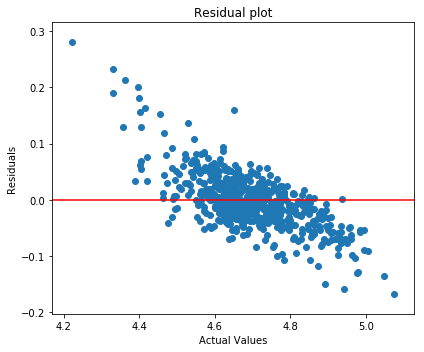

In [28]:
# plot residuals
enet_mod = enet.fit(xtrain_scaled, ytrain)
ypred = enet_mod.predict(xtest_scaled)

resid = ypred - ytest.saleprice

plt.rcParams['figure.figsize'] = (6, 5)
plt.scatter(ytest.saleprice, resid)
plt.axhline(0, linestyle='-', color='r')
plt.title('Residual plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.plot()
plt.tight_layout()

#### plot of ypred versus ytrue

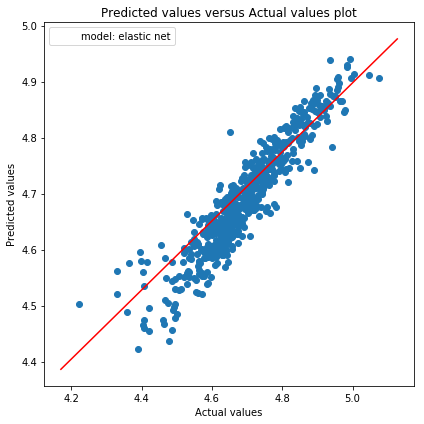

In [29]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(ytest.saleprice, ypred)
ax.set_title('Predicted values versus Actual values plot')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="-", c="r")
plt.plot([], [], ' ', label="model: elastic net")
plt.legend()
plt.tight_layout()

### Feature Selection:

Elastic Net model produced 13 non-zero coefficients.


<Figure size 576x21.6 with 0 Axes>

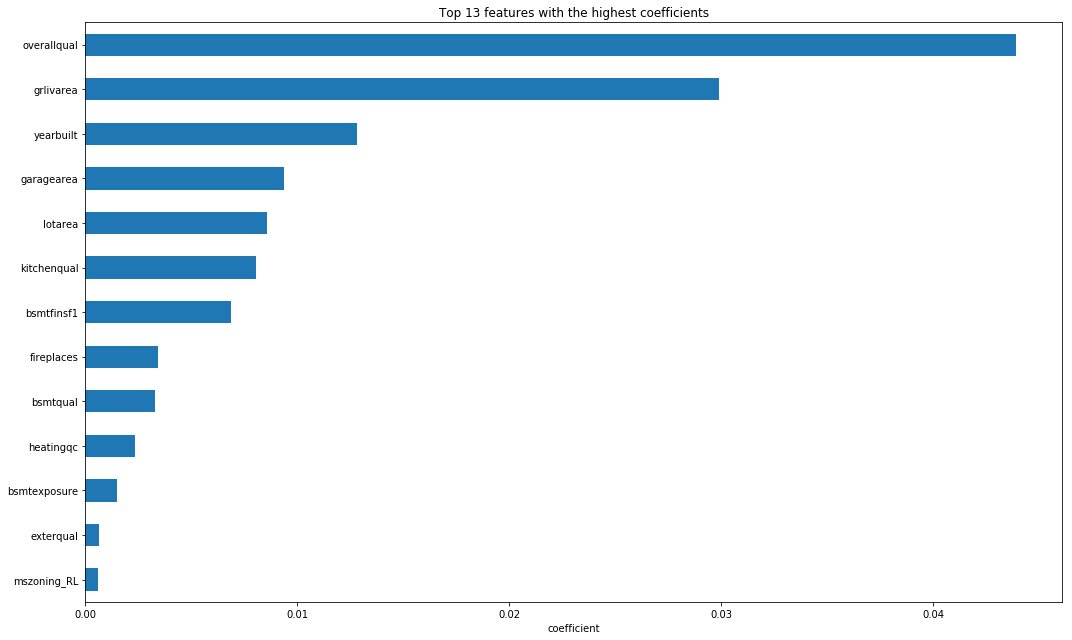

In [39]:
# get list of coefficients that are not 0
coef_labels = [col for col in train_dummies.columns if col != 'saleprice'] # column labels
enet_coef = pd.DataFrame(enet_mod.coef_, index = coef_labels)              # get coefficients from best model
enet_coef = enet_coef[enet_coef[0] != 0]                                   # get non-zero coefficients
print(f'Elastic Net model produced {enet_coef.shape[0]} non-zero coefficients.')

# sort by absolute values
enet_coef = enet_coef.reindex(enet_coef[0].abs().sort_values(ascending=True).index)

plt.figure(figsize=(8, 0.3))
enet_coef.tail(30).plot.barh(figsize=(15,9), legend = None)
plt.title('Top 13 features with the highest coefficients')
plt.xlabel('coefficient')
plt.tight_layout()

<Figure size 576x21.6 with 0 Axes>

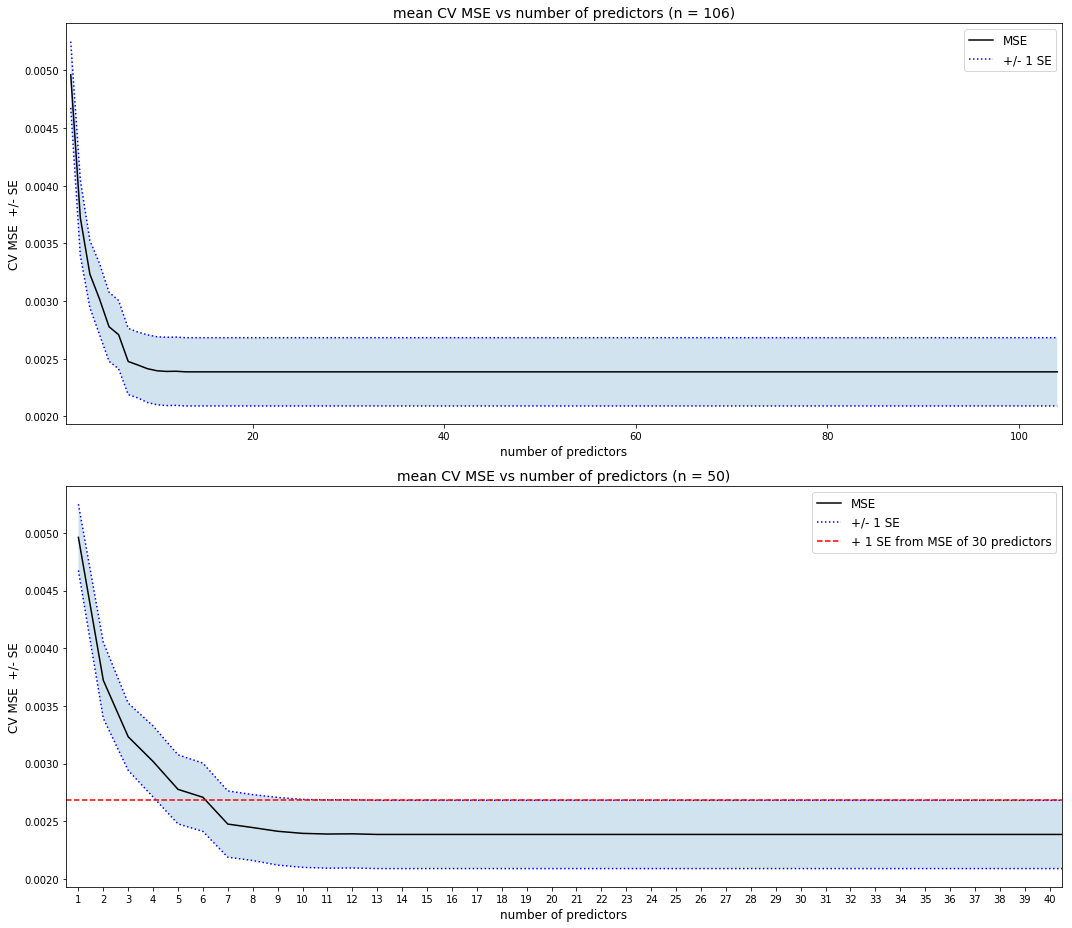

In [42]:
xtrain_df = pd.DataFrame(xtrain_scaled, columns = coef_labels)
    
n_predictors = 104
mse_mean = []
mse_se = []
for n in range(1,n_predictors+1):
    predictors = enet_coef.index[-n:]  
    xtrain_sliced = xtrain_df[predictors] 
    # get validation set MSE and MSE variance
    cv_scores = -cross_val_score(lasso_mod, xtrain_sliced, ytrain, scoring = 'neg_mean_squared_error', cv = 5)
    mse_mean.append(cv_scores.mean())
    mse_se.append(cv_scores.std()/np.sqrt(5))

plt.figure(figsize=(8, 0.3))
fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize=(15,13))

ax[0].plot(np.arange(1,n_predictors+1,1), mse_mean, 'k', label = 'MSE')
ax[0].plot(np.arange(1,n_predictors+1,1),[a+b for a, b in zip(mse_mean,mse_se)], 'b:',label='+/- 1 SE')
ax[0].plot(np.arange(1,n_predictors+1,1),[a-b for a, b, in zip(mse_mean,mse_se)], 'b:')
ax[0].fill_between(np.arange(1,n_predictors+1,1), [a+b for a, b in zip(mse_mean,mse_se)],
                                   [a-b for a, b in zip(mse_mean,mse_se)], alpha=0.2)
ax[0].set_title('mean CV MSE vs number of predictors (n = 106)', fontsize=14)
ax[0].set_ylabel('CV MSE  +/- SE', fontsize = 12)
ax[0].set_xlabel('number of predictors', fontsize = 12)
ax[0].set_xlim(0.5, n_predictors + 0.5)
ax[0].legend(loc = 'upper right',  prop={'size': 12})

ax[1].plot(np.arange(1,n_predictors+1,1), mse_mean, 'k', label = 'MSE')
ax[1].plot(np.arange(1,n_predictors+1,1),[a+b for a, b in zip(mse_mean,mse_se)], 'b:',label='+/- 1 SE')
ax[1].plot(np.arange(1,n_predictors+1,1),[a-b for a, b, in zip(mse_mean,mse_se)], 'b:')
ax[1].fill_between(np.arange(1,n_predictors+1,1), [a+b for a, b in zip(mse_mean,mse_se)],\
                                   [a-b for a, b in zip(mse_mean,mse_se)], alpha=0.2)
ax[1].axhline(mse_se[29]+mse_mean[29], linestyle='--', color='r',label = '+ 1 SE from MSE of 30 predictors')
ax[1].set_title('mean CV MSE vs number of predictors (n = 50)', fontsize=14)
ax[1].set_ylabel('CV MSE  +/- SE', fontsize = 12)
ax[1].set_xlabel('number of predictors', fontsize = 12)
ax[1].set_xticks(np.arange(1,41,1))
ax[1].set_xlim(0.5, 40 + 0.5)
ax[1].legend(loc = 'upper right',  prop={'size': 12})

plt.tight_layout()